## Changing between Camera and World Reference Frames

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline
import numpy as np

### Auxiliary functions

In [42]:
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)

    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis

### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)


## Defining Rigid Body Transformations as functions

In [43]:
 # Translation

def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1]=dx
    T[1,-1]=dy
    T[2,-1]=dz
    return T


# Rotation

from math import pi,cos,sin

def z_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix


## Creating reference frames

Camera: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
World: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Text(0.5, 0.92, 'Camera and World Reference Frames')

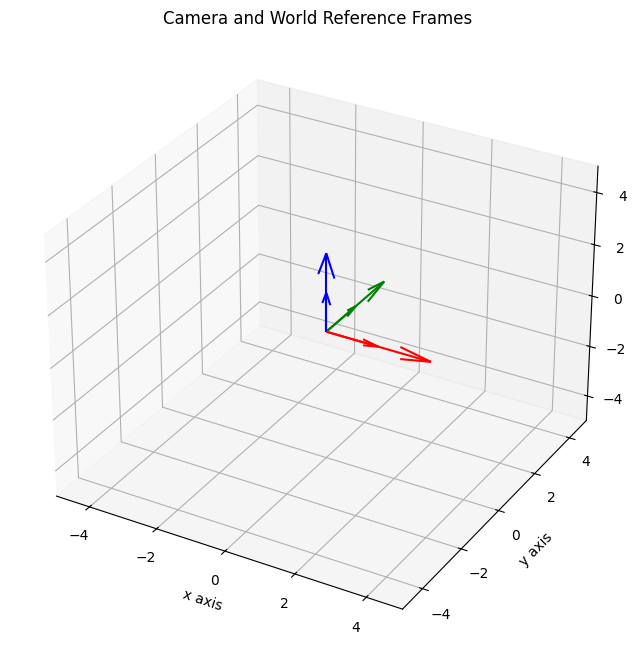

In [44]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))
#origin point
origin =np.array([[0],[0],[0],[1]])

# Create camera and world frames
cam  = np.hstack([base,origin])
world = np.hstack([base,origin])

print ('Camera: \n', cam)
print ('World: \n', world)

# Ploting the world reference frame and the camera frame
axis = set_plot(lim=[-5,5])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis = draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
axis.set_title("Camera and World Reference Frames")

### Now let's move and rotate the camera
#### Perform the necessary transformations so that the camera’s optical axis is placed horizontally (along the Z-axis), with the Y-axis pointing downward and the X-axis pointing to the right (X-axis current orientation unchanged).  Then, position the camera at the point (2,7,5).

In [45]:
# Write your code below and print the result

Rx = x_rotation(-90)
T = move(2,7,5)

Mcam = np.dot(T,Rx)
# or you can use Mcam = T@Rx

cam = np.dot(Mcam,cam)

print(cam)

[[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  5.]
 [ 0.  0.  0.  1.]]


### Let's plot the reference frames

Text(0.5, 0.92, 'Camera and World Reference Frames')

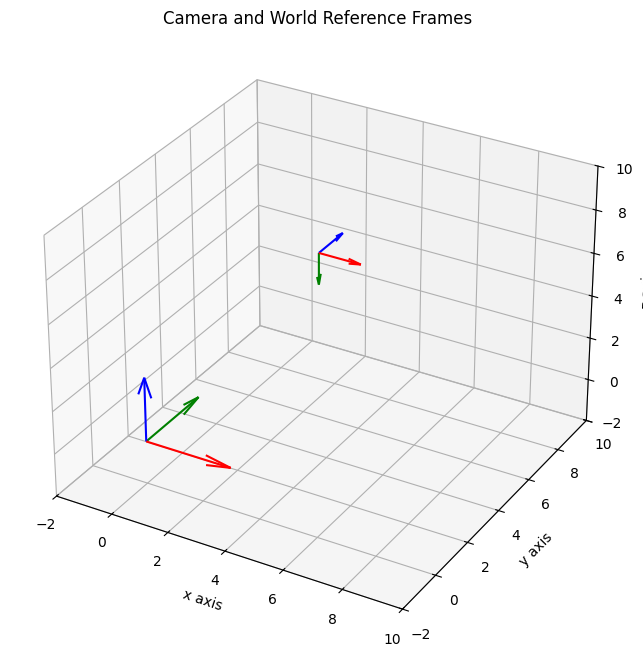

In [46]:
# Ploting the world reference frame and the camera frame
axis = set_plot(lim=[-2,10])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis = draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
axis.set_title("Camera and World Reference Frames")

### Now let's include a house in the scene
#### We are going to use the same house that we created before

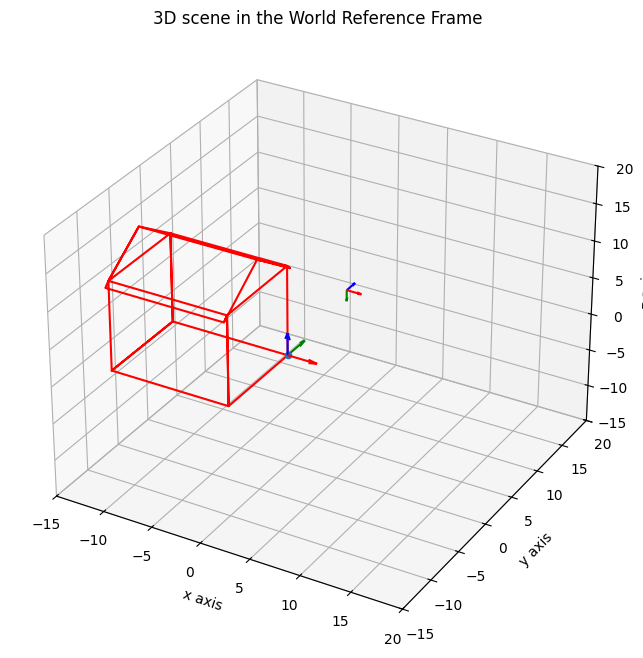

In [47]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)

#add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

# Plotting the house and camera in the same figure

axis = set_plot(lim=[-15,20])
axis.set_title('3D scene in the World Reference Frame')
draw_arrows(world[:,-1],world[:,0:3],axis,3)
draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
axis.plot3D(house[0,:], house[1,:], house[2,:], 'red')

# Plotting the house corner as a reference
axis.scatter(house[0,0], house[1,0], house[2,0],'b')

#### Now you should rotate the house by -90 degrees around the Z-axis and position it so that its corner (0,0,0) will be at (2, 20, 2).

<Axes3D: title={'center': '3D scene in the World Reference Frame'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

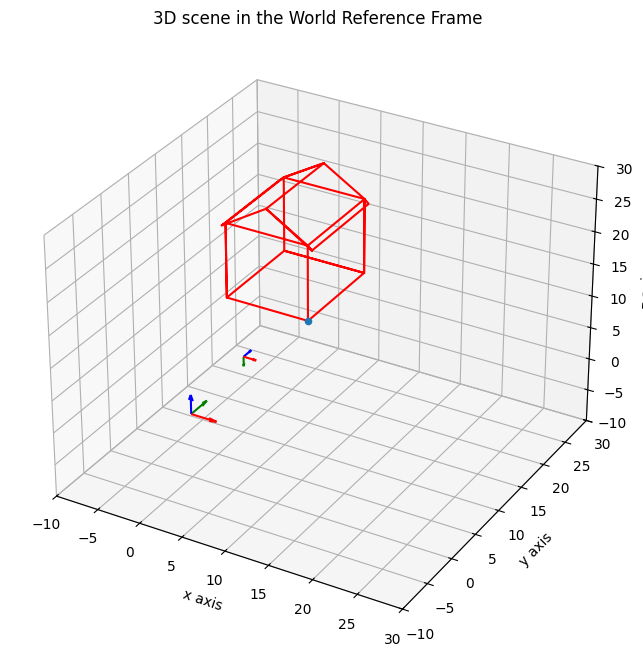

In [48]:
# Write your code below

Rz = z_rotation(-90)
T = move(2,20,2)

house = T@Rz@house

# Plot the house and camera in the same figure

axis = set_plot(lim=[-10,30])
axis.set_title('3D scene in the World Reference Frame')
axis.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotting the house corner
axis.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plotting the camera and world reference frames
draw_arrows(world[:,-1],world[:,0:3],axis,3)
draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)

# ATTENTION #

Consider that a camera has been rotated and translated in the World Frame as:

>    Cam_new = T . R . Cam_ini

 Remember that:

 - Besides moving the camera, the transformation M = T.R can be used to convert coordinates represented in the Camera Frame (P_cam) to coordinates represented in the World Frame (P_world)

>     P_world = M . P_cam

 Now if we want to convert coordinates from the World Frame into coordinates in the Camera Frame, what should we do?

>    P_cam = ??????? P_world

 - We just have to invert M:

>    P_cam = inv(M) . P_world

 So:

 - To transform from camera to world, we have M_cam->world = M
 - To transform from world to camera, we have M_world->cam = inv(M)


In [49]:
# Functions to tranform between the Camera Frame and the World Frame, and vice-versa
# P_world = M*P_cam where M represents the rotation and translation applied to the Camera Frame
# when moving the camera in the World Frame
# M also represesnts the transformation that converts coordinates from the camera frame to the world frame

def cam2world (M,point_cam):
      #Convert from camera frame to world frame
      p_world = np.dot(M,point_cam)
      return p_world

def world2cam (M,point_world):
      #Convert from world frame to camera frame
      M_inv = np.linalg.inv(M)
      p_cam = np.dot(M_inv,point_world)
      return p_cam

 #### Now, from what we have seen above, determine the coordinates of the house corner in the camera’s reference frame. Remember that the corner is located at (2,20,2) and the camera is positioned at (2,7,5), both in the world reference frame. Keep in mind that the camera’s axes are oriented differently from the world axes.



In [50]:
# Write your code below and display the result using print.

corner_w = house[:,0]
corner_c = world2cam(Mcam,corner_w)

print('Corner in the world frame:\n',corner_w)
print('Corner in the camera frame:\n',corner_c)

Corner in the world frame:
 [ 2. 20.  2.  1.]
Corner in the camera frame:
 [ 0.  3. 13.  1.]


# ATTENTION
Because the way we defined our camera, its current state (object) is just the same as its accumulated transformation

In [51]:
print('Camera :\n',cam)
print('Accumulated transformation:\n',Mcam)

Camera :
 [[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  5.]
 [ 0.  0.  0.  1.]]
Accumulated transformation:
 [[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  5.]
 [ 0.  0.  0.  1.]]


#  EXTRA
#### Functions to change the camera in its own reference frame

In [52]:
# Translation in its own frame

def own_move (dx,dy,dz,cam):

    c0 = np.eye(4)

    T = np.eye(4)
    T[0,-1]=dx
    T[1,-1]=dy
    T[2,-1]=dz

    cam = cam@T@c0
    return T, cam

def own_z_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam

def own_x_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam

def own_y_rotation(angle, cam):
    angle = angle*pi/180
    c0 = np.eye(4)
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    cam = cam@rotation_matrix@c0
    return rotation_matrix, cam

#### Let's try some of the functions

Corner in the world frame:
 [ 2. 20.  2.  1.]
Corner in the camera frame:
 [-15.  13.  13.   1.]
Corner in the world frame:
 [ 2. 20.  2.  1.]
Corner in the camera frame:
 [-1.414 13.    19.799  1.   ]


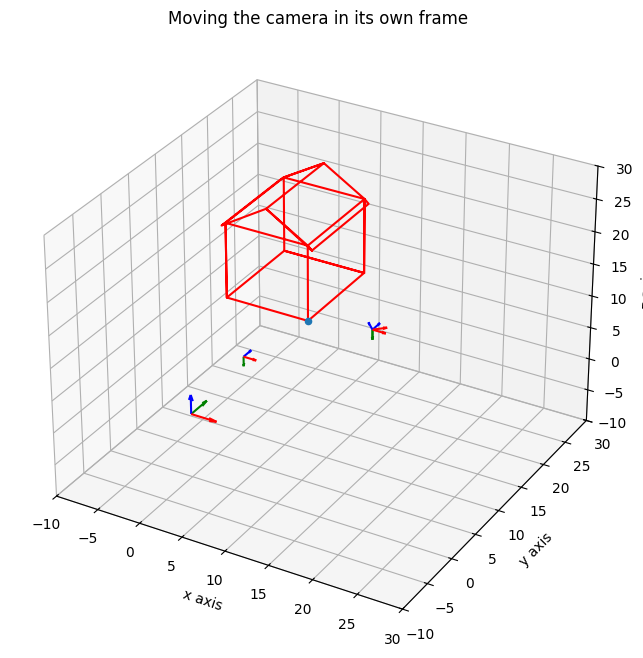

In [53]:
# Plotting the current scene

axis = set_plot(lim=[-10,30])
axis.set_title('Moving the camera in its own frame')
axis.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotting the house corner
axis.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plotting the camera and world reference frames
draw_arrows(world[:,-1],world[:,0:3],axis,3)
draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)

# Moving the current camera along its own X-axis of 5 units

_, cam = own_move(15,-10,0,cam)

# Converting again the coordinates of the house corner

corner_c = world2cam(cam,corner_w)

print('Corner in the world frame:\n',corner_w)
print('Corner in the camera frame:\n',corner_c)

# Plotting the new pose of the camera

draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)


# Rotating the current camera along its own Z-axis of 30 degrees

_, cam = own_y_rotation(-45,cam)

# Converting again the coordinates of the house corner

corner_c = world2cam(cam,corner_w)

print('Corner in the world frame:\n',corner_w)
print('Corner in the camera frame:\n',corner_c)

# Plotting the new pose of the camera

draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
plt.show()
